<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries</b>

In [1]:
from Helpers import *

In [2]:
!pip install mlflow
!pip install scikit-optimize
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import os
import mlflow
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor

In [4]:
mlflow.set_tracking_uri(r"file:///E:/Data Science/Projects/Elo Merchant Category Recommendation")

In [5]:
Agg_transactions = pd.read_csv(r'E:\Data Science\Projects\Elo Merchant Category Recommendation\Aggregate_Transactions.csv')
Agg_merchants = pd.read_csv(r'E:\Data Science\Projects\Elo Merchant Category Recommendation\Aggregate_Merchants.csv')
Agg_train = pd.read_csv(r'E:\Data Science\Projects\Elo Merchant Category Recommendation\Aggregate_Train.csv')

In [6]:
pd.set_option('display.max_columns',None)
Agg_transactions

,card_id,trans_purchase_date_min,trans_purchase_date_max,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,trans_is_weekend_mode,trans_month_difference_sum,trans_month_difference_mean,trans_month_difference_min,trans_month_difference_max,first_transaction,last_transaction,card_id.1,trans_purchase_amount_sum,trans_purchase_amount_max,trans_purchase_amount_min,trans_purchase_amount_mean,trans_purchase_amount_median,card_id_,authorized_flag_sum,authorized_flag_mean,city_id_mode,city_id_nunique,category_1_sum,category_1_mean,category_1_mode,category_2_sum,category_2_mean,category_2_mode,category_3_sum,category_3_mean,category_3_mode,installments_mean,installments_sum,installments_min,installments_max,installments_mode,merchant_category_id_mode,merchant_category_id_nunique,merchant_id_mode,merchant_id_nunique,state_id_mode,state_id_nunique,subsector_id_nunique,subsector_id_mode,purchase_at_Afternoon_mode,purchase_at_Afternoon_sum,purchase_at_Afternoon_mean,purchase_at_Evening_mode,purchase_at_Evening_sum,purchase_at_Evening_mean,purchase_at_Morning_mode,purchase_at_Morning_sum,purchase_at_Morning_mean,purchase_at_Night_mode,purchase_at_Night_sum,purchase_at_Night_mean,purchase_at_Noon_mode,purchase_at_Noon_sum,purchase_at_Noon_mean
0,C_ID_00007093c1,2017-02-14 14:00:43,2018-04-09 16:23:59,2017,6.344,6,8,0,0,22,16,0.166,25,0,14982,99.219,84,112,3003,2584,C_ID_00007093c1,-78.174,1.507,-0.729,-0.518,-0.596,C_ID_00007093c1,116,0.768,244,5,28,0.185,0,397.000,2.629,3.000,326,2.159,2,1.285,194,1,6,1,307,19,M_ID_9400cf2342,31,2,4,13,19,0.000,49.000,0.325,0.000,37.000,0.245,0.000,36.000,0.238,0.000,5.000,0.033,0.000,24.000,0.159
1,C_ID_0001238066,2017-09-28 22:25:14,2018-04-30 19:57:30,2017,6.759,12,24,5,0,23,19,0.434,63,0,13037,89.910,83,97,2776,2562,C_ID_0001238066,-86.624,0.768,-0.741,-0.597,-0.651,C_ID_0001238066,142,0.979,314,18,4,0.028,0,233.000,1.607,1.000,326,2.248,2,1.683,244,1,10,1,307,33,M_ID_d17aabd756,86,9,5,18,19,0.000,27.000,0.186,0.000,57.000,0.393,0.000,16.000,0.110,0.000,15.000,0.103,0.000,30.000,0.207
2,C_ID_0001506ef0,2017-01-14 16:16:01,2018-03-22 09:14:30,2017,6.691,12,6,5,0,22,12,0.471,32,0,6597,97.015,85,114,3034,2602,C_ID_0001506ef0,-36.049,1.494,-0.740,-0.530,-0.706,C_ID_0001506ef0,64,0.941,137,3,0,0.000,0,200.000,2.941,3.000,69,1.015,1,0.015,1,0,1,0,705,20,M_ID_b1fc88154d,29,19,2,12,33,0.000,14.000,0.206,0.000,4.000,0.059,0.000,18.000,0.265,0.000,1.000,0.015,0.000,31.000,0.456
3,C_ID_0001793786,2017-01-21 10:15:21,2017-12-31 17:35:56,2017,7.237,9,14,3,0,23,15,0.212,51,0,23289,97.037,87,109,3027,2682,C_ID_0001793786,-61.027,1.936,-0.745,-0.254,-0.486,C_ID_0001793786,213,0.887,179,11,2,0.008,0,366.000,1.525,1.000,245,1.021,1,0.021,5,0,1,0,278,55,M_ID_923d57de8d,144,-1,5,25,37,0.000,62.000,0.258,0.000,83.000,0.346,0.000,31.000,0.129,0.000,12.000,0.050,0.000,52.000,0.217
4,C_ID_000183fdda,2017-08-07 09:49:14,2018-04-26 13:46:18,2017,6.748,2,8,2,0,23,22,0.238,35,0,13540,92.109,83,100,2829,2567,C_ID_000183fdda,-77.890,1.905,-0.738,-0.530,-0.672,C_ID_000183fdda,140,0.952,161,9,4,0.027,0,420.000,2.857,3.000,332,2.259,2,1.844,271,1,10,1,367,36,M_ID_f9cfe0a43b,79,3,6,20,16,0.000,22.000,0.150,1.000,77.000,0.524,0.000,14.000,0.095,0.000,7.000,0.048,0.000,27.000,0.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325521,C_ID_ffff1d9928,2017-10-26 15:09:18,2018-04-20 10:28:14,2018,5.867,1,8,0,7,21,14,0.200,3,0,1338,89.200,83,95,2749,2573,C_ID_ffff1d9928,-9.522,0.004,-0.747,-0.635,-0.728,C_ID_ffff1d9928,12,0.800,114,3,3,0.200,0,48.000,3.200,4.000,32,2.133,2,1.867,28,1,10,1,705,8,M_ID_cabba1e9ae,11,4,3,8,33,0.000,3.0

In [7]:
Agg_transactions = Agg_transactions.rename(columns={'merchant_id_mode' : 'merchant_id'})
Agg_transactions = Agg_transactions.drop(columns=['card_id_','card_id.1'],axis=1)

In [8]:
Agg_merchants = Agg_merchants[['merchant_id']]
Agg_merchants

,merchant_id
0,M_ID_000025127f
1,M_ID_0000699140
2,M_ID_00006a5552
3,M_ID_000087311e
4,M_ID_0000ab0b2d
...,...
324024,M_ID_fffeeb852d
324025,M_ID_fffef87522
324026,M_ID_ffff0af8e7
324027,M_ID_ffff655e2c


In [9]:
merged_transactions_merchants = pd.merge(Agg_transactions, Agg_merchants, on = 'merchant_id', how = 'inner')
merged_transactions_merchants.shape

(281324, 66)

In [10]:
merged_transactions_merchants.head()

,card_id,trans_purchase_date_min,trans_purchase_date_max,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,trans_is_weekend_mode,trans_month_difference_sum,trans_month_difference_mean,trans_month_difference_min,trans_month_difference_max,first_transaction,last_transaction,trans_purchase_amount_sum,trans_purchase_amount_max,trans_purchase_amount_min,trans_purchase_amount_mean,trans_purchase_amount_median,authorized_flag_sum,authorized_flag_mean,city_id_mode,city_id_nunique,category_1_sum,category_1_mean,category_1_mode,category_2_sum,category_2_mean,category_2_mode,category_3_sum,category_3_mean,category_3_mode,installments_mean,installments_sum,installments_min,installments_max,installments_mode,merchant_category_id_mode,merchant_category_id_nunique,merchant_id,merchant_id_nunique,state_id_mode,state_id_nunique,subsector_id_nunique,subsector_id_mode,purchase_at_Afternoon_mode,purchase_at_Afternoon_sum,purchase_at_Afternoon_mean,purchase_at_Evening_mode,purchase_at_Evening_sum,purchase_at_Evening_mean,purchase_at_Morning_mode,purchase_at_Morning_sum,purchase_at_Morning_mean,purchase_at_Night_mode,purchase_at_Night_sum,purchase_at_Night_mean,purchase_at_Noon_mode,purchase_at_Noon_sum,purchase_at_Noon_mean
0,C_ID_00007093c1,2017-02-14 14:00:43,2018-04-09 16:23:59,2017,6.344,6,8,0,0,22,16,0.166,25,0,14982,99.219,84,112,3003,2584,-78.174,1.507,-0.729,-0.518,-0.596,116,0.768,244,5,28,0.185,0,397.000,2.629,3.000,326,2.159,2,1.285,194,1,6,1,307,19,M_ID_9400cf2342,31,2,4,13,19,0.000,49.000,0.325,0.000,37.000,0.245,0.000,36.000,0.238,0.000,5.000,0.033,0.000,24.000,0.159
1,C_ID_0001238066,2017-09-28 22:25:14,2018-04-30 19:57:30,2017,6.759,12,24,5,0,23,19,0.434,63,0,13037,89.910,83,97,2776,2562,-86.624,0.768,-0.741,-0.597,-0.651,142,0.979,314,18,4,0.028,0,233.000,1.607,1.000,326,2.248,2,1.683,244,1,10,1,307,33,M_ID_d17aabd756,86,9,5,18,19,0.000,27.000,0.186,0.000,57.000,0.393,0.000,16.000,0.110,0.000,15.000,0.103,0.000,30.000,0.207
2,C_ID_0001506ef0,2017-01-14 16:16:01,2018-03-22 09:14:30,2017,6.691,12,6,5,0,22,12,0.471,32,0,6597,97.015,85,114,3034,2602,-36.049,1.494,-0.740,-0.530,-0.706,64,0.941,137,3,0,0.000,0,200.000,2.941,3.000,69,1.015,1,0.015,1,0,1,0,705,20,M_ID_b1fc88154d,29,19,2,12,33,0.000,14.000,0.206,0.000,4.000,0.059,0.000,18.000,0.265,0.000,1.000,0.015,0.000,31.000,0.456
3,C_ID_0001793786,2017-01-21 10:15:21,2017-12-31 17:35:56,2017,7.237,9,14,3,0,23,15,0.212,51,0,23289,97.037,87,109,3027,2682,-61.027,1.936,-0.745,-0.254,-0.486,213,0.887,179,11,2,0.008,0,366.000,1.525,1.000,245,1.021,1,0.021,5,0,1,0,278,55,M_ID_923d57de8d,144,-1,5,25,37,0.000,62.000,0.258,0.000,83.000,0.346,0.000,31.000,0.129,0.000,12.000,0.050,0.000,52.000,0.217
4,C_ID_000183fdda,2017-08-07 09:49:14,2018-04-26 13:46:18,2017,6.748,2,8,2,0,23,22,0.238,35,0,13540,92.109,83,100,2829,2567,-77.890,1.905,-0.738,-0.530,-0.672,140,0.952,161,9,4,0.027,0,420.000,2.857,3.000,332,2.259,2,1.844,271,1,10,1,367,36,M_ID_f9cfe0a43b,79,3,6,20,16,0.000,22.000,0.150,1.000,77.000,0.524,0.000,14.000,0.095,0.000,7.000,0.048,0.000,27.000,0.184


In [11]:
df = pd.merge(Agg_train, merged_transactions_merchants, on='card_id', how='inner')

In [12]:
df

,card_id,feature_1,feature_2,feature_3,target,month,year,week,dayofweek,days_since_joining,months_since_joining,feature_sum,feature_mean,feature_median,feature_max,feature_min,feature_std,feature_range,feature_sum_x_months,months_feature_1,months_feature_1_ratio,months_feature_2,months_feature_2_ratio,months_feature_3,months_feature_3_ratio,trans_purchase_date_min,trans_purchase_date_max,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,trans_is_weekend_mode,trans_month_difference_sum,trans_month_difference_mean,trans_month_difference_min,trans_month_difference_max,first_transaction,last_transaction,trans_purchase_amount_sum,trans_purchase_amount_max,trans_purchase_amount_min,trans_purchase_amount_mean,trans_purchase_amount_median,authorized_flag_sum,authorized_flag_mean,city_id_mode,city_id_nunique,category_1_sum,category_1_mean,category_1_mode,category_2_sum,category_2_mean,category_2_mode,category_3_sum,category_3_mean,category_3_mode,installments_mean,installments_sum,installments_min,installments_max,installments_mode,merchant_category_id_mode,merchant_category_id_nunique,merchant_id,merchant_id_nunique,state_id_mode,state_id_nunique,subsector_id_nunique,subsector_id_mode,purchase_at_Afternoon_mode,purchase_at_Afternoon_sum,purchase_at_Afternoon_mean,purchase_at_Evening_mode,purchase_at_Evening_sum,purchase_at_Evening_mean,purchase_at_Morning_mode,purchase_at_Morning_sum,purchase_at_Morning_mean,purchase_at_Night_mode,purchase_at_Night_sum,purchase_at_Night_mean,purchase_at_Noon_mode,purchase_at_Noon_sum,purchase_at_Noon_mean
0,C_ID_92a2005557,5,2,1,-0.820,1,2017,52,6,3049,100,8,2.667,2.000,5,1,2.082,4,800,500,0.050,200,0.020,100,0.010,2017-06-27 14:18:08,2018-04-29 11:23:05,2017,7.670,12,11,5,0,23,14,0.340,96,0,26642,94.475,83,103,2870,2564,-181.471,0.051,-0.739,-0.644,-0.696,269,0.954,69,9,0,0.000,0,294.000,1.043,1.000,286,1.014,1,0.014,4,0,1,0,560,45,M_ID_1a81c358a3,116,9,3,21,34,0.000,59.000,0.209,0.000,47.000,0.167,0.000,58.000,0.206,0.000,19.000,0.067,0.000,99.000,0.351
1,C_ID_d639edf6cd,2,2,0,0.688,1,2016,53,4,3415,112,4,1.333,2.000,2,0,1.155,2,448,224,0.018,224,0.018,0,0.000,2017-01-11 08:21:22,2018-04-28 17:43:11,2017,4.545,4,21,4,8,23,19,0.273,12,0,4578,104.045,83,114,3037,2564,-29.868,-0.146,-0.730,-0.679,-0.700,42,0.955,143,5,0,0.000,0,204.000,4.636,5.000,44,1.000,1,0.000,0,0,0,0,705,9,M_ID_5634fd83e0,14,5,2,8,33,0.000,12.000,0.273,1.000,26.000,0.591,0.000,3.000,0.068,0.000,0.000,0.000,0.000,3.000,0.068
2,C_ID_186d6a6901,4,3,0,0.142,1,2017,52,6,3049,100,7,2.333,3.000,4,0,2.082,4,700,400,0.040,300,0.030,0,0.000,2017-09-26 16:22:21,2018-04-18 11:00:11,2017,7.481,10,7,2,0,23,16,0.160,13,0,7487,92.432,83,97,2779,2575,-52.686,1.446,-0.741,-0.650,-0.708,81,1.000,17,7,13,0.160,0,249.000,3.074,4.000,169,2.086,2,1.136,92,1,3,1,278,27,M_ID_00a6ca8a8a,54,22,5,14,37,0.000,32.000,0.395,0.000,19.000,0.235,0.000,11.000,0.136,0.000,5.000,0.062,0.000,14.000,0.173
3,C_ID_cdbd2c0db2,1,3,0,-0.160,1,2017,52,6,3049,100,4,1.333,1.000,3,0,1.528,3,400,100,0.010,300,0.030,0,0.000,2017-11-12 00:00:00,2018-04-28 18:50:25,2018,5.061,1,7,4,0,23,11,0.331,54,0,14477,88.816,83,94,2732,2564,-98.996,0.451,-0.746,-0.607,-0.678,161,0.988,17,7,12,0.074,0,574.000,3.521,4.000,329,2.018,2,1.025,167,1,3,1,278,35,M_ID_cecefd9589,99,22,7,17,37,0.000,19.000,0.117,0.000,42.000,0.258,0.000,47.000,0.288,0.000,14.000,0.086,0.000,41.000,0.252
4,C_ID_0894217f2f,4,2,0,0.872,1,2016,53,4,3415,112,6,2.000,2.000,4,0,2.000,4,672,448,0.036,224,0.018,0,0.000,2017-01-10 17:14:53,2017-09-15 21:06:17,2017,4.919,6,25,5,0,23,14,0.270,10,0,3650,98.649,90,107,3038,2789,-15.176,0.034,-0.679,-0.410,-0.432,36,0.973,69,4,1,0.027,0,41.000,1.108,1.000,102,2.757,3,2.973,110,1,10,3,884,16,M_ID_12637a44e9,26,9,3,10,27,0.000,7.000,0.189,0.000,11.000,0.297,0.000,6.000,0.162,0.000,2.000,0.054,0.000,

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:180%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:1000;
            text-align:
            center;"><b>Model Training</b>

In [13]:
df=df.drop(['trans_purchase_date_max','trans_purchase_date_min','merchant_id'],axis = 1)

X=df.drop(columns=['target','card_id'])
y=df['target']

In [14]:
X.columns.tolist()

['feature_1',
 'feature_2',
 'feature_3',
 'month',
 'year',
 'week',
 'dayofweek',
 'days_since_joining',
 'months_since_joining',
 'feature_sum',
 'feature_mean',
 'feature_median',
 'feature_max',
 'feature_min',
 'feature_std',
 'feature_range',
 'feature_sum_x_months',
 'months_feature_1',
 'months_feature_1_ratio',
 'months_feature_2',
 'months_feature_2_ratio',
 'months_feature_3',
 'months_feature_3_ratio',
 'trans_purchase_year_mode',
 'trans_purchase_month_mean',
 'trans_purchase_month_mode',
 'trans_purchase_day_mode',
 'trans_purchase_dow_mode',
 'trans_purchase_hour_min',
 'trans_purchase_hour_max',
 'trans_purchase_hour_mode',
 'trans_is_weekend_mean',
 'trans_is_weekend_sum',
 'trans_is_weekend_mode',
 'trans_month_difference_sum',
 'trans_month_difference_mean',
 'trans_month_difference_min',
 'trans_month_difference_max',
 'first_transaction',
 'last_transaction',
 'trans_purchase_amount_sum',
 'trans_purchase_amount_max',
 'trans_purchase_amount_min',
 'trans_purchase

In [15]:
X.head()

,feature_1,feature_2,feature_3,month,year,week,dayofweek,days_since_joining,months_since_joining,feature_sum,feature_mean,feature_median,feature_max,feature_min,feature_std,feature_range,feature_sum_x_months,months_feature_1,months_feature_1_ratio,months_feature_2,months_feature_2_ratio,months_feature_3,months_feature_3_ratio,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,trans_is_weekend_mode,trans_month_difference_sum,trans_month_difference_mean,trans_month_difference_min,trans_month_difference_max,first_transaction,last_transaction,trans_purchase_amount_sum,trans_purchase_amount_max,trans_purchase_amount_min,trans_purchase_amount_mean,trans_purchase_amount_median,authorized_flag_sum,authorized_flag_mean,city_id_mode,city_id_nunique,category_1_sum,category_1_mean,category_1_mode,category_2_sum,category_2_mean,category_2_mode,category_3_sum,category_3_mean,category_3_mode,installments_mean,installments_sum,installments_min,installments_max,installments_mode,merchant_category_id_mode,merchant_category_id_nunique,merchant_id_nunique,state_id_mode,state_id_nunique,subsector_id_nunique,subsector_id_mode,purchase_at_Afternoon_mode,purchase_at_Afternoon_sum,purchase_at_Afternoon_mean,purchase_at_Evening_mode,purchase_at_Evening_sum,purchase_at_Evening_mean,purchase_at_Morning_mode,purchase_at_Morning_sum,purchase_at_Morning_mean,purchase_at_Night_mode,purchase_at_Night_sum,purchase_at_Night_mean,purchase_at_Noon_mode,purchase_at_Noon_sum,purchase_at_Noon_mean
0,5,2,1,1,2017,52,6,3049,100,8,2.667,2.000,5,1,2.082,4,800,500,0.050,200,0.020,100,0.010,2017,7.670,12,11,5,0,23,14,0.340,96,0,26642,94.475,83,103,2870,2564,-181.471,0.051,-0.739,-0.644,-0.696,269,0.954,69,9,0,0.000,0,294.000,1.043,1.000,286,1.014,1,0.014,4,0,1,0,560,45,116,9,3,21,34,0.000,59.000,0.209,0.000,47.000,0.167,0.000,58.000,0.206,0.000,19.000,0.067,0.000,99.000,0.351
1,2,2,0,1,2016,53,4,3415,112,4,1.333,2.000,2,0,1.155,2,448,224,0.018,224,0.018,0,0.000,2017,4.545,4,21,4,8,23,19,0.273,12,0,4578,104.045,83,114,3037,2564,-29.868,-0.146,-0.730,-0.679,-0.700,42,0.955,143,5,0,0.000,0,204.000,4.636,5.000,44,1.000,1,0.000,0,0,0,0,705,9,14,5,2,8,33,0.000,12.000,0.273,1.000,26.000,0.591,0.000,3.000,0.068,0.000,0.000,0.000,0.000,3.000,0.068
2,4,3,0,1,2017,52,6,3049,100,7,2.333,3.000,4,0,2.082,4,700,400,0.040,300,0.030,0,0.000,2017,7.481,10,7,2,0,23,16,0.160,13,0,7487,92.432,83,97,2779,2575,-52.686,1.446,-0.741,-0.650,-0.708,81,1.000,17,7,13,0.160,0,249.000,3.074,4.000,169,2.086,2,1.136,92,1,3,1,278,27,54,22,5,14,37,0.000,32.000,0.395,0.000,19.000,0.235,0.000,11.000,0.136,0.000,5.000,0.062,0.000,14.000,0.173
3,1,3,0,1,2017,52,6,3049,100,4,1.333,1.000,3,0,1.528,3,400,100,0.010,300,0.030,0,0.000,2018,5.061,1,7,4,0,23,11,0.331,54,0,14477,88.816,83,94,2732,2564,-98.996,0.451,-0.746,-0.607,-0.678,161,0.988,17,7,12,0.074,0,574.000,3.521,4.000,329,2.018,2,1.025,167,1,3,1,278,35,99,22,7,17,37,0.000,19.000,0.117,0.000,42.000,0.258,0.000,47.000,0.288,0.000,14.000,0.086,0.000,41.000,0.252
4,4,2,0,1,2016,53,4,3415,112,6,2.000,2.000,4,0,2.000,4,672,448,0.036,224,0.018,0,0.000,2017,4.919,6,25,5,0,23,14,0.270,10,0,3650,98.649,90,107,3038,2789,-15.176,0.034,-0.679,-0.410,-0.432,36,0.973,69,4,1,0.027,0,41.000,1.108,1.000,102,2.757,3,2.973,110,1,10,3,884,16,26,9,3,10,27,0.000,7.000,0.189,0.000,11.000,0.297,0.000,6.000,0.162,0.000,2.000,0.054,0.000,11.000,0.297


In [16]:
X.shape

(174431, 85)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.autolog()


model = DecisionTreeRegressor()
base_model=model.fit(X_train, y_train)

2025/10/19 21:20:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/10/19 21:20:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/19 21:20:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/10/19 21:20:29 WARNING mlflow.utils.autologging_utils: MLflow xgboost autologging is known to be compatible with 1.4.2 <= xgboost <= 2.1.4, but the installed version is 3.0.0. If you encounter errors during autologging, try upgrading / downgrading xgboost to a compatible version, or try upgrading MLflow.
2025/10/19 21:20:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/10/19 21:20:29 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
   

In [18]:
importances_DT=base_model.feature_importances_
feature_names=X.columns

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importance - Decision Tree Regressor')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

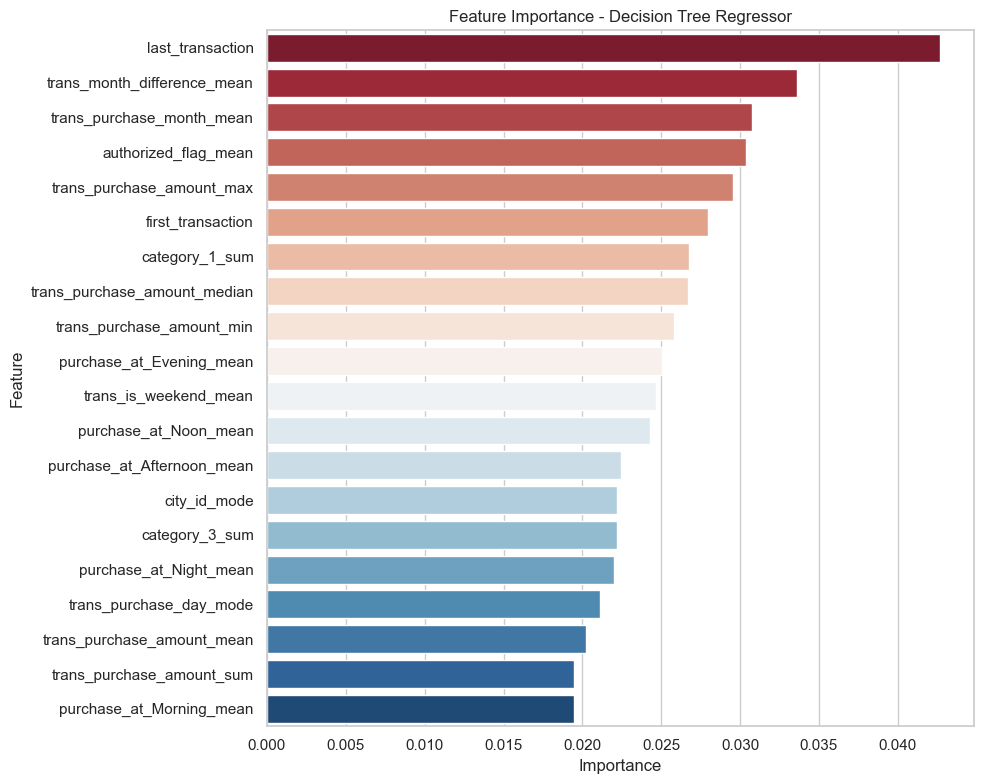

In [19]:
feature_imp_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances_DT})
    .sort_values(by='Importance', ascending=False)
)
top_20_features = feature_imp_df.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features,hue='Feature')
plt.title('Feature Importance - Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

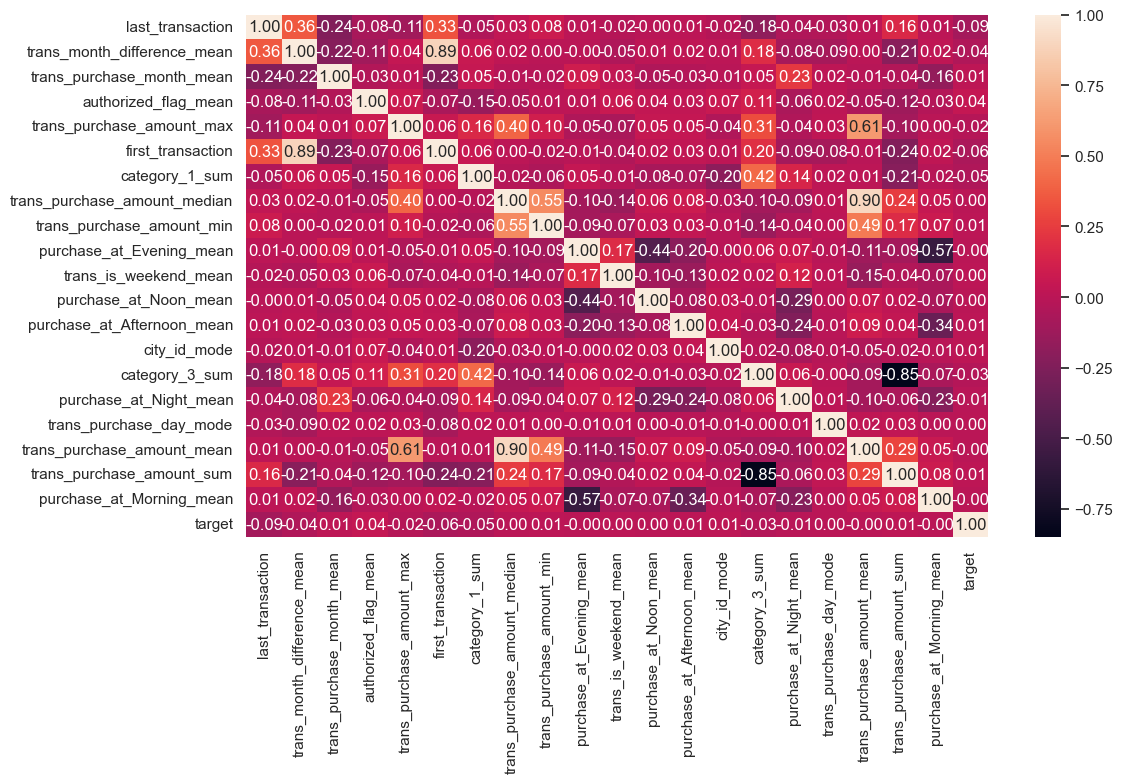

In [20]:
top_20_features_list=top_20_features.Feature.tolist()
corr = df[top_20_features_list+ ['target']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

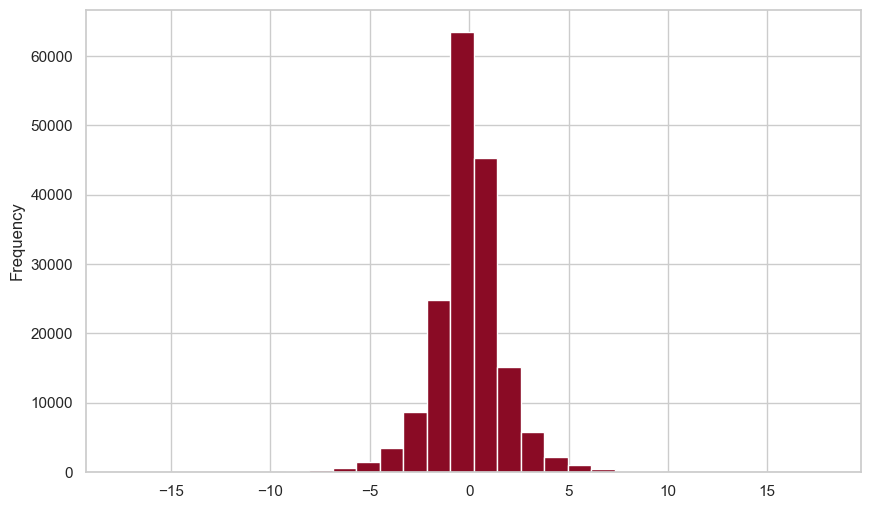

In [21]:
df_top20_and_y = df[top_20_features_list + ['target']]
df_top20_and_y = df_top20_and_y[df_top20_and_y['target'] > -25]
df_top20_and_y['target'].plot(kind='hist', bins=30, figsize=(10, 6))

In [22]:
X=df_top20_and_y.drop(columns=['target'])
y=df_top20_and_y['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
lr = LinearRegression()
mlflow.autolog()


lr.fit(X_train, y_train)

2025/10/19 21:20:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/10/19 21:20:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/19 21:20:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/10/19 21:20:51 WARNING mlflow.utils.autologging_utils: MLflow xgboost autologging is known to be compatible with 1.4.2 <= xgboost <= 2.1.4, but the installed version is 3.0.0. If you encounter errors during autologging, try upgrading / downgrading xgboost to a compatible version, or try upgrading MLflow.
2025/10/19 21:20:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/10/19 21:20:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


LinearRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mse)
print(r2)
print(mae)
print(rmse)

2.8752858546784243
0.019605605859832842
1.1892104597826436
1.6956667876320584


In [26]:

models = {
   # "Ridge": Pipeline([("scaler", StandardScaler()), ("model", Ridge())]),
    #"Lasso": Pipeline([("scaler", StandardScaler()), ("model", Lasso())]),
    #"ElasticNet": Pipeline([("scaler", StandardScaler()), ("model", ElasticNet())]),
    #"KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())]),
    "BayesianRidge": Pipeline([("scaler", StandardScaler()), ("model", BayesianRidge())]),

    # No scaler
    #"RandomForest": Pipeline([("model", RandomForestRegressor(max_samples=0.8))]),
    "GradientBoosting": Pipeline([("model", GradientBoostingRegressor())]),
    "DecisionTree": Pipeline([("model", DecisionTreeRegressor())]),
    "AdaBoost": Pipeline([("model", AdaBoostRegressor())]),
    "XGBoost": Pipeline([("model", XGBRegressor(objective='reg:squarederror'))]),
    "LGBMRegressor": Pipeline([("model", LGBMRegressor(objective='huber'))]),
    "CatBoost": Pipeline([("model", CatBoostRegressor(verbose=0))])


}

In [27]:
param_grids = {
    #"Ridge": {"model__alpha": np.logspace(-3, 3, 30)},
    #"Lasso": {"model__alpha": np.logspace(-3, 3, 30)},
    #"ElasticNet": {
       # "model__alpha": np.logspace(-3, 3, 20),
      #  "model__l1_ratio": np.linspace(0, 1, 10)
    #},
    #"RandomForest": {
        #"model__n_estimators": [100, 200],
        #"model__max_depth": [None, 10, 20],
        #"model__min_samples_split": [2, 5]

   # },
    "GradientBoosting": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.1],
        "model__max_depth": [3, 5]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    },

    #"KNN": {
        #"model__n_neighbors": [3, 5, 10],
        #"model__weights": ['uniform', 'distance']
    #},
    "BayesianRidge": {
        "model__alpha_1": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__alpha_2": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__lambda_1": Real(1e-6, 1e-1, prior='log-uniform'),
        "model__lambda_2": Real(1e-6, 1e-1, prior='log-uniform')
    },
    "AdaBoost": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.01, 0.1, 1]
    },
    "XGBoost": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5],
        "model__learning_rate": [0.01, 0.1]
    },
    "LGBMRegressor": {
        "model__n_estimators": [100, 200],
        "model__num_leaves": [31, 50],
        "model__learning_rate": [0.01, 0.1]
    }
}

In [28]:
mlflow.autolog()
# CaV and scoring
cv = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = {
    "rmse": make_scorer(mean_squared_error, greater_is_better=False),
}

# Save path
folder_path = r'E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs'
os.makedirs(folder_path, exist_ok=True)

results = {}

# Main loop
for name, pipeline in models.items():
    print(f"\n Tuning: {name}")
    param_grid = param_grids.get(name, {})

    if param_grid:
        search = BayesSearchCV(
            estimator=pipeline,
            search_spaces=param_grid,
            n_iter=20,
            cv=cv,
            scoring=scoring,
            refit="rmse",
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
    else:
        print(" No parameters to tune, fitting directly...")
        search = pipeline

    # Fit model
    search.fit(X_train, y_train)

    # Results
    if isinstance(search, BayesSearchCV):
        best_model = search.best_estimator_
        best_params = search.best_params_
        best_rmse = np.sqrt(-search.best_score_)
    else:
        best_model = search
        best_params = {}
        best_rmse = np.nan

    # Test evaluation
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        "best_estimator": best_model,
        "best_score_rmse": best_rmse,
        "test_score_rmse": test_rmse,
        "best_params": best_params
    }

    # Save model
    save_path = os.path.join(folder_path, f"{name}_best_model.pkl")
    joblib.dump(best_model, save_path)
    print(f" Saved {name} model to {save_path}")

2025/10/19 21:20:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/10/19 21:20:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/19 21:20:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/10/19 21:20:52 WARNING mlflow.utils.autologging_utils: MLflow xgboost autologging is known to be compatible with 1.4.2 <= xgboost <= 2.1.4, but the installed version is 3.0.0. If you encounter errors during autologging, try upgrading / downgrading xgboost to a compatible version, or try upgrading MLflow.
2025/10/19 21:20:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.



 Tuning: BayesianRidge
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:21:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:21:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('model', BayesianRidge())]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__alpha_1': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'model__alpha_2': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'model__lambda_1': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'model__lambda_2': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize')},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\BayesianRidge_best_model.pkl']

c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(100, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [0.01, 0.1] was inferred to Real(low=0.01, high=0.1, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.01, 0.1), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [3, 5] was inferred to I

 Saved BayesianRidge model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\BayesianRidge_best_model.pkl

 Tuning: GradientBoosting
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:39:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:42:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:42:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:42:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:44:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:44:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:44:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:45:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:45:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:45:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:48:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:48:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:48:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:50:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:50:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:50:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:51:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:51:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:51:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:54:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:54:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:54:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:56:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:56:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:56:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 21:59:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:59:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 21:59:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:01:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:01:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:01:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:03:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:07:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model',
                                         GradientBoostingRegressor())]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__learning_rate': [0.01, 0.1],
                             'model__max_depth': [3, 5],
                             'model__n_estimators': [100, 200]},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\GradientBoosting_best_model.pkl']

c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [2, 5] was inferred to Integer(low=2, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(


 Saved GradientBoosting model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\GradientBoosting_best_model.pkl

 Tuning: DecisionTree
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [2, 5] was inferred to Integer(low=2, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [2, 5] was inferred to Integer(low=2, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(5)] before, using random point [20, np.int64(4)]
  warnings.warn(
2025/10/19 22:08:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(3)] before, using random point [None, np.int64(2)]
  warnings.warn(
2025/10/19 22:08:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:50 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:50 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(3)] before, using random point [20, np.int64(5)]
  warnings.warn(
2025/10/19 22:08:50 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:08:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:08:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(3)] before, using random point [None, np.int64(3)]
  warnings.warn(
2025/10/19 22:08:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:09:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:09:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(3)] before, using random point [None, np.int64(3)]
  warnings.warn(
2025/10/19 22:09:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:09:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:09:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(4)] before, using random point [10, np.int64(2)]
  warnings.warn(
2025/10/19 22:09:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:09:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:09:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(4)] before, using random point [20, np.int64(4)]
  warnings.warn(
2025/10/19 22:09:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:09:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:09:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(5)] before, using random point [10, np.int64(2)]
  warnings.warn(
2025/10/19 22:09:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:09:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:09:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model', DecisionTreeRegressor())]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__max_depth': [None, 10, 20],
                             'model__min_samples_split': [2, 5]},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\DecisionTree_best_model.pkl']

c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [50, 100] was inferred to Integer(low=50, high=100, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(50, 100), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [50, 100] was inferred to Integer(low=50, high=100, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(50, 100), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [50, 100] was inferred to Inte

 Saved DecisionTree model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\DecisionTree_best_model.pkl

 Tuning: AdaBoost
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:15:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:16:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:16:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:16:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:17:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:17:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:17:09 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:17:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:17:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:17:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:18:21 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:18:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:18:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:19:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:19:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:19:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:19:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:19:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.01), np.int64(50)] before, using random point [0.01, np.int64(61)]
  warnings.warn(
2025/10/19 22:19:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:20:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:20:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:20:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:21:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:21:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.01), np.int64(50)] before, using random point [0.1, np.int64(50)]
  warnings.warn(
2025/10/19 22:21:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:21:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:21:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.01), np.int64(50)] before, using random point [1, np.int64(87)]
  warnings.warn(
2025/10/19 22:21:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:22:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:22:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.01), np.int64(50)] before, using random point [0.1, np.int64(54)]
  warnings.warn(
2025/10/19 22:22:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:22:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:23:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model', AdaBoostRegressor())]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__learning_rate': [0.01, 0.1, 1],
                             'model__n_estimators': [50, 100]},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\AdaBoost_best_model.pkl']

 Saved AdaBoost model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\AdaBoost_best_model.pkl

 Tuning: XGBoost
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(100, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [3, 5] was inferred to Integer(low=3, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(3, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [0.01, 0.1] was inferred to Real(low

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:19 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:24:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:24:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__learning_rate': [0.01, 0.1],
                             'model__max_depth': [3, 5],
                             'model__n_estimators': [100, 200]},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\XGBoost_best_model.pkl']

c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(100, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [31, 50] was inferred to Integer(low=31, high=50, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(31, 50), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\TPC-Store\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [0.01, 0.1] was inferred to Re

 Saved XGBoost model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\XGBoost_best_model.pkl

 Tuning: LGBMRegressor
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:25:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:25:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:26:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0
2025/10/19 22:26:00 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Fitting 3 folds for each of 1 candidates, totalling 3 fits


2025/10/19 22:26:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4818
[LightGBM] [Info] Number of data points in the train set: 137992, number of used features: 20
[LightGBM] [Info] Start training from score -0.026047


2025/10/19 22:26:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


BayesSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model',
                                         LGBMRegressor(objective='huber'))]),
              n_iter=20, n_jobs=-1, random_state=42, refit='rmse',
              scoring={'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')},
              search_spaces={'model__learning_rate': [0.01, 0.1],
                             'model__n_estimators': [100, 200],
                             'model__num_leaves': [31, 50]},
              verbose=1)

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\LGBMRegressor_best_model.pkl']

 Saved LGBMRegressor model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\LGBMRegressor_best_model.pkl

 Tuning: CatBoost
 No parameters to tune, fitting directly...


2025/10/19 22:26:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not find experiment with ID 0


Pipeline(steps=[('model',
                 <catboost.core.CatBoostRegressor object at 0x000002A543F62120>)])

['E:\\Data Science\\Projects\\DEPI - Final Project - Elo Merchant Category Recommendation\\outputs\\CatBoost_best_model.pkl']

 Saved CatBoost model to E:\Data Science\Projects\DEPI - Final Project - Elo Merchant Category Recommendation\outputs\CatBoost_best_model.pkl


In [29]:
baseline_rmse = 3.84
baseline_R_squared = 0.015

summary_data = []

for name, res in results.items():
    test_rmse = res["test_score_rmse"]
    cv_rmse = res["best_score_rmse"]

    # Calculate improvement score for RMSE
    test_score_rmse_percent = (1 - (test_rmse / baseline_rmse)) * 100


    summary_data.append({
        "Model": name,
        "CV_RMSE": round(cv_rmse, 4),
        "Test_RMSE": round(test_rmse, 4),
        "Score_%_RMSE": round(test_score_rmse_percent, 2),
        "Best_Params": res["best_params"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data).sort_values(by="Test_RMSE")

# Display table
print("\n Model Performance Summary:")
print(summary_df[["Model", "CV_RMSE", "Test_RMSE",  "Score_%_RMSE", ]].to_string(index=False))

# Print Best Model
best_model_row = summary_df.iloc[0]
print(f"\n Best Model: {best_model_row['Model']}")
print(f"Test RMSE: {best_model_row['Test_RMSE']}")
print(f"RMSE Improvement: {best_model_row['Score_%_RMSE']}%")
print(f"Best Params: {best_model_row['Best_Params']}")


 Model Performance Summary:
           Model  CV_RMSE  Test_RMSE  Score_%_RMSE
        CatBoost      NaN      1.674        56.420
         XGBoost    1.675      1.676        56.360
GradientBoosting    1.676      1.677        56.320
   LGBMRegressor    1.677      1.678        56.300
   BayesianRidge    1.693      1.696        55.840
        AdaBoost    1.698      1.700        55.720
    DecisionTree    1.747      1.737        54.760

 Best Model: CatBoost
Test RMSE: 1.6736
RMSE Improvement: 56.42%
Best Params: {}


In [30]:
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

<Figure size 800x500 with 0 Axes>

<Axes: ylabel='target'>

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs Predicted')

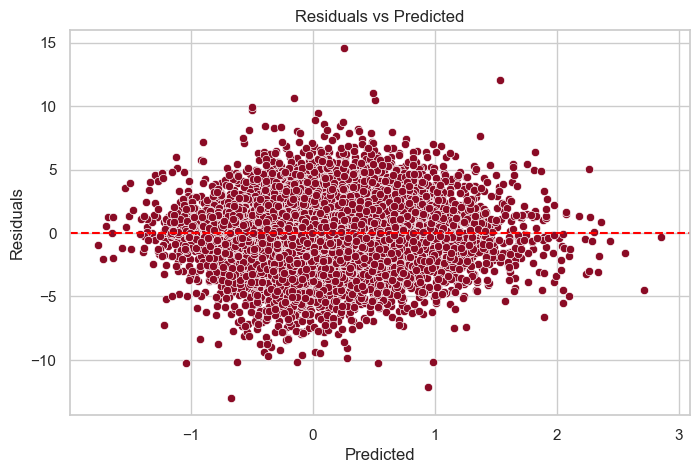

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='target', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Residuals')

Text(0.5, 0, 'Residual')

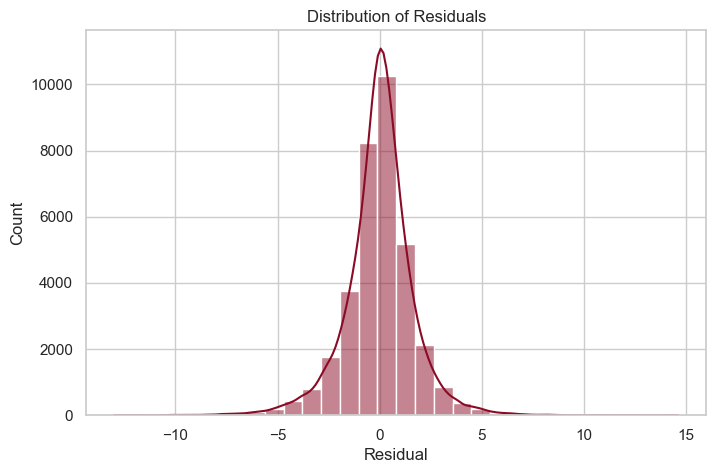

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()